In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

%matplotlib inline

np.random.seed(7)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten, Conv2D, MaxPool2D,BatchNormalization 
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator 
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')


Using TensorFlow backend.


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

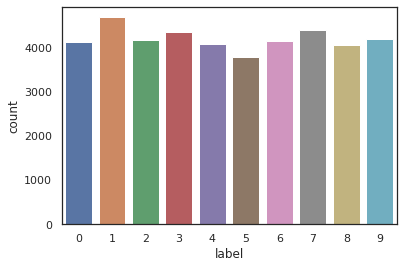

In [2]:
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")

Y_train=train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 

del train
# print(train)
g = sns.countplot(Y_train)
Y_train.value_counts()


In [3]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [4]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [8]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
Y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [10]:
#Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print(X_train.shape)
print(type(test))

(42000, 784)
<class 'pandas.core.frame.DataFrame'>


In [11]:
X_train = X_train.to_numpy()
X_train=X_train.reshape(-1,28,28,1)
test = test.to_numpy()
test=test.reshape(-1,28,28,1)

In [12]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [13]:
random_seed=3
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

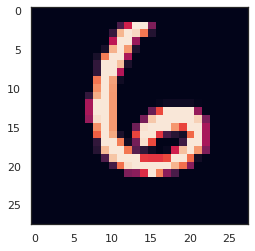

In [14]:
g = plt.imshow(X_train[0][:,:,0])

In [15]:
datagen = ImageDataGenerator(zoom_range = 0.1, width_shift_range = 0.1, height_shift_range = 0.1, rotation_range = 10) 

In [17]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3), padding='Same', activation='relu', input_shape=(28,28,1),name='first'))
model.add(BatchNormalization())

model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu', name='second'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu',name='third'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first (Conv2D)               (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
second (Conv2D)              (None, 26, 26, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
third (Conv2D)               (None, 13, 13, 64)        36928     
_________________________________________________________________
batch_normalization_7 (Batch (None, 13, 13, 64)       

In [18]:
opt=Adam(learning_rate=0.001)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [19]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [22]:
# history=model.fit(X_train,Y_train,batch_size=32,epochs=30,validation_data=(X_val, Y_val),verbose=1)
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size = 32), epochs = 40, 
                              validation_data = (X_val, Y_val), callbacks = [learning_rate_reduction])

Epoch 1/40
1182/1182 [==============================] - 24s 21ms/step - loss: 0.3031 - accuracy: 0.9061 - val_loss: 0.0996 - val_accuracy: 0.9702
Epoch 2/40
1182/1182 [==============================] - 21s 17ms/step - loss: 0.1199 - accuracy: 0.9642 - val_loss: 0.0480 - val_accuracy: 0.9850
Epoch 3/40
1182/1182 [==============================] - 19s 16ms/step - loss: 0.0958 - accuracy: 0.9711 - val_loss: 0.0577 - val_accuracy: 0.9831
Epoch 4/40
1182/1182 [==============================] - 20s 17ms/step - loss: 0.0784 - accuracy: 0.9775 - val_loss: 0.0497 - val_accuracy: 0.9850
Epoch 5/40
1182/1182 [==============================] - 20s 17ms/step - loss: 0.0754 - accuracy: 0.9773 - val_loss: 0.0728 - val_accuracy: 0.9767

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/40
1182/1182 [==============================] - 20s 17ms/step - loss: 0.0594 - accuracy: 0.9832 - val_loss: 0.0300 - val_accuracy: 0.9914
Epoch 7/40
1182/1182 [=====================

4200/4200 [==============================] - 0s 108us/step
Final loss: 0.0148, final accuracy: 0.9952
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy', 'lr'])


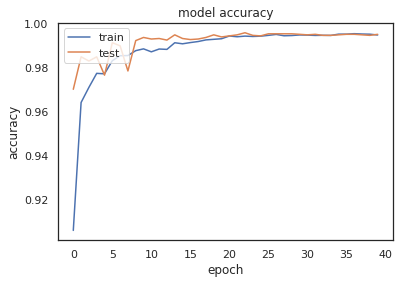

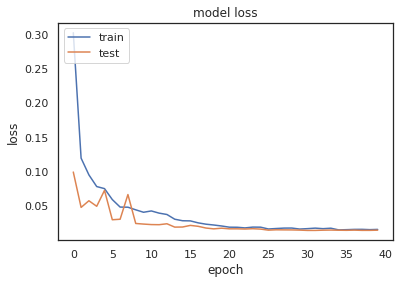

In [23]:
final_loss, final_acc = model.evaluate(X_val, Y_val, verbose=1)

print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
predictions = model.predict_classes(test, verbose=1)
test = test.reshape(-1, 28, 28, 1) / 255
y_pred = model.predict(test, batch_size = 64)

y_pred = np.argmax(y_pred,axis = 1)
y_pred = pd.Series(y_pred,name="Label")
y_pred

28000/28000 [==============================] - 2s 85us/step


0        1
1        1
2        1
3        1
4        1
        ..
27995    1
27996    1
27997    1
27998    1
27999    1
Name: Label, Length: 28000, dtype: int64

In [26]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("aksr.csv", index=False, header=True)

In [27]:
# model.save_weights(filepath='final_weight.h5')
model.save("model.h5")